<a href="https://colab.research.google.com/github/minamky/datasci112-college-acceptance-rate-predictor/blob/main/3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Machine Learning Model to Predict Admission Rates For Schools that Don't Report Admission Rates


More competitive colleges in the United States are withholding their admission rates to stop students from being deterred from applying. The goal of the machine learning model is to predict the admission rates for schools that do not report which can help student determine how competitive a college is and determine if they want to apply. We used a regression model because we are predicting a quantitiative variable (the admission rate). 

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor

In [3]:
df_merged = pd.read_csv("/content/df_merged.csv")
df_complete = pd.read_csv("/content/df_complete")
df_merged

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,id,Latitude,Longitude,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,100654,34.783368,-86.568502,17694.0,15.0,88.0,450.0,450.0,NaN,19.0
1,University of Alabama at Birmingham,3,17857.0,0.0,8568.0,20400.0,0.6117,0.8060,Birmingham,AL,...,100663,33.505697,-86.799345,17857.0,6.0,93.0,640.0,650.0,NaN,28.0
2,University of Alabama in Huntsville,3,17054.0,0.0,11338.0,23734.0,0.5714,0.7711,Huntsville,AL,...,100706,34.724557,-86.640449,17054.0,34.0,94.0,640.0,650.0,NaN,29.0
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,100724,32.364317,-86.295677,19853.0,18.0,87.0,480.0,480.0,NaN,19.0
4,The University of Alabama,3,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,100751,33.211875,-87.545978,21649.0,23.0,76.0,620.0,640.0,600.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Arizona College of Nursing-Fort Lauderdale,3,0.0,0.0,20090.0,20090.0,NaN,1.0000,Fort Lauderdale,FL,...,495439,26.205783,-80.138479,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1675,Arizona College of Nursing-Tucson,3,0.0,0.0,20170.0,20170.0,NaN,1.0000,Tucson,AZ,...,495448,32.217803,-110.875881,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1676,Arizona College of Nursing-Phoenix,3,0.0,0.0,20170.0,20170.0,NaN,0.9091,Phoenix,AZ,...,495457,33.635804,-112.117327,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1677,The Pennsylvania State University,3,26010.0,0.0,18450.0,35514.0,0.7281,0.7827,University Park,PA,...,495767,40.796500,-77.862848,26010.0,NaN,NaN,NaN,NaN,NaN,NaN


# HistGradientBoostingRegressor

## Model Selection

I tested many features and different combinations of features to see which combination produces the best model. I used the HistGradientBoostingRegressor because many schools were missing different statistics and I wanted to include them in the model.

In [4]:
x_train = df_merged[["Accreditor", "State", "City", "In State Tuition", "Out of State Tution", "Completion Rate", "Net Cost", "Percent of freshmen submitting SAT scores", "Percent of freshmen submitting ACT scores", "SAT Math 75th percentile score", "SAT Critical Reading 75th percentile score", "SAT Writing 75th percentile score", "ACT Composite 75th percentile score"]]
y_train = df_merged["Admission Rate"]

In [5]:
#testing many features to see which features produce the best model
features = [(OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["State"]),
            (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["Accreditor"]),
            (StandardScaler(), ["SAT Math 75th percentile score"]),
            (StandardScaler(), ["Percent of freshmen submitting SAT scores"]),
            (StandardScaler(), ["Completion Rate"]),
            (StandardScaler(), ["In State Tuition"]),
            (StandardScaler(), ["Out of State Tution"]),
            (StandardScaler(), ["SAT Critical Reading 75th percentile score"]),
            (StandardScaler(), ["ACT Composite 75th percentile score"]),
            (StandardScaler(), ["SAT Writing 75th percentile score"]),
            (StandardScaler(), ["Percent of freshmen submitting ACT scores"]),
            (StandardScaler(), ["Net Cost"]),
            (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["City"])
            ]

In [6]:
for i in range(len(features)):
  col_transformer = make_column_transformer(
      *features[:i+1],
      remainder="drop"
      )
  pipeline = make_pipeline(
    col_transformer,
    HistGradientBoostingRegressor()
  )
  print(i, -cross_val_score(
      pipeline, x_train, y_train, 
      scoring="neg_mean_squared_error", cv=10).mean())  

0 0.04406552543237362
1 0.04457714698543172
2 0.03224991020580181
3 0.03281746746381813
4 0.032442402447237485
5 0.030296092685135563
6 0.030477349291036616
7 0.031050301361095912
8 0.03090627386700005
9 0.030482222523607043
10 0.03073965558744161
11 0.031396572749472565
12 0.03161568328245473


The model with State, Accreditor, SAT Math 75th percentile score, Percent of freshment submitting SAT scores, Completion Rate, and In State Tuitition as features had the lowest mean squared error, therefore those are the features that will be used for the final model.

## Hypertuning with three different parameters

In [7]:
from sklearn.model_selection import GridSearchCV

col_transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["State"]),
    (OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ["Accreditor"]),
    (StandardScaler(), ["SAT Math 75th percentile score"]),
    (StandardScaler(), ["Percent of freshmen submitting SAT scores"]),
    (StandardScaler(), ["Completion Rate"]),
    (StandardScaler(), ["In State Tuition"]),
    remainder="drop"
    )

pipeline = make_pipeline(
    col_transformer,
    HistGradientBoostingRegressor()
)

pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder-1',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['State']),
                                   ('onehotencoder-2',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Accreditor']),
                                   ('standardscaler-1', StandardScaler(),
                                    ['SAT Math 75th percentile score']),
                                   ('standardscaler-2', StandardScaler(),
                                    ['Percent of freshmen submitting SAT scores']),
                                   ('standardscaler-3', StandardScaler(),
                                    ['Completion Rate']),
        

In [8]:
#testing different parameters using grid to find the best parameters that produce lowest mean squared error
grid_cv = GridSearchCV(
    pipeline,
    param_grid={
        'histgradientboostingregressor__loss': ["squared_error", "absolute_error", "poisson"],
        'histgradientboostingregressor__max_leaf_nodes': range(3,40,10),
        'histgradientboostingregressor__min_samples_leaf': (2,20, 5),
        },
    scoring="neg_mean_squared_error", cv=10)
grid_cv.fit(x_train, y_train)
grid_cv.best_params_

{'histgradientboostingregressor__loss': 'absolute_error',
 'histgradientboostingregressor__max_leaf_nodes': 13,
 'histgradientboostingregressor__min_samples_leaf': 5}

The best parameters were using absolute_error for the loss, 13 for the max_leaf_node, and 5 for the min_sample_leaf.

# Applying Model on Example

I predicted the admission rate for Stanford University and a college in the dataset that was missing a admission rate that I saved earlier.

In [9]:
#Predicting Stanford University admission rate using model as example
df_stanford_test = df_merged[df_merged["Name"]=="Stanford University"]

#Predicting college with missing admission rate as example
test_unknown = df_complete[df_complete["Name"]=="South University-Montgomery"]

In [10]:
model = make_pipeline(
    col_transformer,
    HistGradientBoostingRegressor(loss='absolute_error', max_leaf_nodes= 13, min_samples_leaf= 5)
)

model.fit(X=x_train, y=y_train)
x_test = pd.DataFrame(test_unknown)

stanford_prediction= model.predict(X= df_stanford_test)
stanford_prediction

array([0.05540299])

In [11]:
unknown_prediction= model.predict(X= test_unknown)
unknown_prediction

array([0.64163103])

According to our model, Stanford University is predicted to have around a 5.5% acceptance rate and South University-Montgomery is predicted to have around a 64% acceptance rate. This model could be used to predict the admission rate for any college that has the features that the model uses. 

# K-Means Clustering to Categorize Different Colleges

Many people consider colleges within ranges of competitiveness such as safety schools, target schools, and reach schools. The competitiveness is often associated with high average test scores and low admission rates, so I created an unsupervised machine learning model which finds groups of similar observations.

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

I changed the Accreditor column to abbreviations which will make the graphs a lot more readable in the future.

In [13]:
df_merged["Accreditor Abbrev"] = df_merged["Accreditor"].map({
    "Southern Association of Colleges and Schools Commission on Colleges" : "SACSCC",
    "National Accrediting Commission of Career Arts and Sciences": "NACCAS",
    "Higher Learning Commission": "HLC",
    "Association for Bibical Higher Educaiton": "ABHE",
    "Middle States Commission on Higher Education": "MSCHE",
    "New England Commission on Higher Education": "NECHE",
    "Western Association of Schools and Colleges Senior Colleges and University Commission": "WASCSCUC",
    "Northwest Commission on Colleges and Universities": "NCCU",
    "Association of Advanced Rabbinical and Talmudic Schools": "AARTS",
    "Transnational Association of Christian Colleges and Schools": "TACCS",
    "Accrediting Commission of Career Schools and Colleges": "ACCSC",
    "Association of Institutions of Jewish Studies": "AIJS",
    "Accrediting Bureau of Health Education Schools": "ABHES",
    "National Association of Schools of Music": "NASM"
})
df_merged

,Name,Primarily Undergraduate,Public: Net Cost,Private: Net Cost,In State Tuition,Out of State Tution,Completion Rate,Admission Rate,City,State,...,Latitude,Longitude,Net Cost,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 75th percentile score,SAT Math 75th percentile score,SAT Writing 75th percentile score,ACT Composite 75th percentile score,Accreditor Abbrev
0,Alabama A & M University,3,17694.0,0.0,10024.0,18634.0,0.2866,0.8965,Normal,AL,...,34.783368,-86.568502,17694.0,15.0,88.0,450.0,450.0,NaN,19.0,SACSCC
1,University of Alabama at Birmingham,3,17857.0,0.0,8568.0,20400.0,0.6117,0.8060,Birmingham,AL,...,33.505697,-86.799345,17857.0,6.0,93.0,640.0,650.0,NaN,28.0,SACSCC
2,University of Alabama in Huntsville,3,17054.0,0.0,11338.0,23734.0,0.5714,0.7711,Huntsville,AL,...,34.724557,-86.640449,17054.0,34.0,94.0,640.0,650.0,NaN,29.0,SACSCC
3,Alabama State University,3,19853.0,0.0,11068.0,19396.0,0.3177,0.9888,Montgomery,AL,...,32.364317,-86.295677,19853.0,18.0,87.0,480.0,480.0,NaN,19.0,SACSCC
4,The University of Alabama,3,21649.0,0.0,11620.0,31090.0,0.7214,0.8039,Tuscaloosa,AL,...,33.211875,-87.545978,21649.0,23.0,76.0,620.0,640.0,600.0,30.0,SACSCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Arizona College of Nursing-Fort Lauderdale,3,0.0,0.0,20090.0,20090.0,NaN,1.0000,Fort Lauderdale,FL,...,26.205783,-80.138479,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES
1675,Arizona College of Nursing-Tucson,3,0.0,0.0,20170.0,20170.0,NaN,1.0000,Tucson,AZ,...,32.217803,-110.875881,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES
1676,Arizona College of Nursing-Phoenix,3,0.0,0.0,20170.0,20170.0,NaN,0.9091,Phoenix,AZ,...,33.635804,-112.117327,0.0,NaN,NaN,NaN,NaN,NaN,NaN,ABHES
1677,The Pennsylvania State University,3,26010.0,0.0,18450.0,35514.0,0.7281,0.7827,University Park,PA,...,40.796500,-77.862848,26010.0,NaN,NaN,NaN,NaN,NaN,NaN,MSCHE


I used only two features for the clustering, so it will be easier to visualize the clusters on a graph, which were SAT Math 75th percentile score and Admission Rate.

In [14]:
X_train = df_merged[["SAT Math 75th percentile score", "Admission Rate", "Accreditor Abbrev"]].dropna()

col_transformer = make_column_transformer(
    (StandardScaler(), ["SAT Math 75th percentile score", "Admission Rate"]),
    (OneHotEncoder(), ["Accreditor Abbrev"]),
    remainder="drop"
)

model = KMeans(n_clusters = 3)
pipeline = make_pipeline(
    col_transformer,
    model
)
pipeline.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['SAT Math 75th percentile '
                                                   'score',
                                                   'Admission Rate']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Accreditor Abbrev'])])),
                ('kmeans', KMeans(n_clusters=3))])

In [15]:
X_train.columns = ['SAT Math','Admission Rate', 'Accreditor']
X_train

,SAT Math,Admission Rate,Accreditor
0,450.0,0.8965,SACSCC
1,650.0,0.8060,SACSCC
2,650.0,0.7711,SACSCC
3,480.0,0.9888,SACSCC
4,640.0,0.8039,SACSCC
...,...,...,...
1540,550.0,0.7749,SACSCC
1550,530.0,0.7943,WASCSCUC
1559,590.0,0.9179,SACSCC
1642,580.0,0.8311,SACSCC


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='SAT Math', ylabel='Admission Rate'>

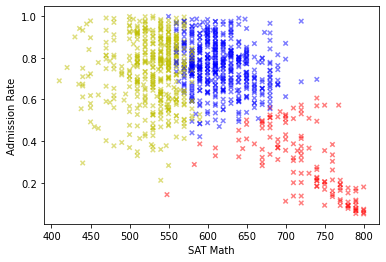

In [16]:
centroids = model.cluster_centers_
clusters  = model.labels_
clusters = pd.Series(clusters).map({
    0:"r",
    1:"b",
    2:"y"
})
X_train.plot.scatter(x="SAT Math", y="Admission Rate", c=clusters, marker="x", alpha = 0.5)

The yellow cluster is elite colleges that have high average test scores and have low admission rates; Many people would consider these reach schools. The red cluster comprises of semi-competetive colleges that require medium SAT scores but range from medium to high admission rates which many people would consider target schools. The blue cluster is low-competitive colleges that have generally higher admission rates rates and will on average accept students with lower test scores. These would often be considered safety schools.